<h2> LSTM Models <h2>


Create various LSTM Models and evaluating them<br>

**NOTE: Using a dataset with 10 of the best performing feature based on another student analysis**

**Features (x):**<br>
- *soil_vwc*
- *soil_ec*
- *irrigation_24h*
- *irrigation_36h*
- *irrigation_48h*
- *relative_humidity_ds_24h*
- *relative_humidity_ds_36h*
- *relative_humidity_ds_48h*
- *precipitation_36h*
- *precipitation_24h*
- *precipitation_48h*

**Target (y)** is *soil_vwc*

<br><br>


Reading the dataset file

In [16]:
df_scaled

,soil_vwc,soil_ec,irrigation_24h,irrigation_36h,irrigation_48h,relative_humidity_ds_24h,relative_humidity_ds_36h,relative_humidity_ds_48h,precipitation_36h,precipitation_24h,precipitation_48h
timestamp,,,,,,,,,,,
2023-07-11 10:10:00,-0.211271,-0.568325,-0.546472,-0.697505,-0.850408,0.635486,0.676346,0.719121,-0.319756,-0.267801,-0.362414
2023-07-11 10:20:00,-0.162457,-0.446523,-0.546472,-0.697505,-0.850408,0.612772,0.652443,0.693960,-0.319756,-0.267801,-0.362414
2023-07-11 10:30:00,-0.143942,-0.389065,-0.546472,-0.697505,-0.850408,0.578156,0.616018,0.655617,-0.319756,-0.267801,-0.362414
2023-07-11 10:40:00,-0.123743,-0.360037,-0.546472,-0.697505,-0.850408,0.537642,0.573385,0.610740,-0.319756,-0.267801,-0.362414
2023-07-11 10:50:00,-0.118693,-0.350317,-0.546472,-0.697505,-0.850408,0.505280,0.539330,0.574893,-0.319756,-0.267801,-0.362414
...,...,...,...,...,...,...,...,...,...,...,...
2023-09-19 23:10:00,-0.446924,-0.722202,-0.546472,-0.697505,-0.850408,0.969098,0.898885,1.135242,-0.319756,-0.267801,-0.362414
2023-09-19 23:20:00,-0.448607,-0.722202,-0.546472,-0.697505,-0.850408,0.958112,0.885717,1.129158,-0.319756,-0.267801,-0.362414
2023-09-19 23:30:00,-0.446924,-0.722202,-0.546472,-0.697505,-0.850408,0.946782,0.873174,1.122946,-0.319756,-0.267801,-0.362414


<h3> Organizing data in time series <h3>

In [1]:
# Data Preparation for neural network
def singleStepSampler(df, window):
    xRes = []
    yRes = []
    for i in range(0, len(df) - window):
        res = []
        for j in range(0, window):
            r = df.iloc[i + j].values
            res.append(r)
        xRes.append(res)
        yRes.append(df[['soil_vwc']].iloc[i + window].values)
    return np.array(xRes), np.array(yRes)

For now using Window size = 5 and 80%-20% train-test suddivision

In [6]:
import pandas as pd
import numpy as np

# reading the ds file
df_scaled = pd.read_excel("./2023-stuard/df_best_scaled.xlsx", index_col=0)

# Costant values:
WINDOWS_SIZE = 5
SPLIT = 0.8

X_temp, y_temp = singleStepSampler(df_scaled, WINDOWS_SIZE)

# Split data into training and testing
X_train = X_temp[:int(SPLIT * len(X_temp))]
y_train = y_temp[:int(SPLIT * len(y_temp))]
X_test = X_temp[int(SPLIT * len(X_temp)):]
y_test = y_temp[int(SPLIT * len(y_temp)):]

X_train.shape, y_train.shape, X_test.shape, y_test.shape  # Check shapes

((8116, 5, 11), (8116, 1), (2030, 5, 11), (2030, 1))

## Building LSTM Model 

## First Model (lstmModel_1)

- 1 lstm layer (8 neurons)
- 1 Output layer
- 50 epochs

Trying using a validation set (33% of train set) to calculate loss and MAE every epoch.

Model: "lstmModel_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ LSTM_1 (LSTM)                        │ (None, 8)                   │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense_1 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 649 (2.54 KB)

 Trainable params: 649 (2.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - MAE: 0.5956 - loss: 0.5424 - val_MAE: 0.5309 - val_loss: 0.4276
Epoch 2/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - MAE: 0.3559 - loss: 0.2031 - val_MAE: 0.4337 - val_loss: 0.2975
Epoch 3/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - MAE: 0.2958 - loss: 0.1405 - val_MAE: 0.3502 - val_loss: 0.2006
Epoch 4/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - MAE: 0.2492 - loss: 0.1006 - val_MAE: 0.2936 - val_loss: 0.1375
Epoch 5/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - MAE: 0.2009 - loss: 0.0689 - val_MAE: 0.2645 - val_loss: 0.1073
Epoch 6/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - MAE: 0.1626 - loss: 0.0487 - val_MAE: 0.2510 - val_loss: 0.0948
Epoch 7/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - MAE: 0.1404 - loss: 0.0406 - val_MAE: 0.2406 - val_loss: 0.0871
Epoch 8/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - MAE: 0.1288 - loss: 0.0363 - val_MAE: 0.2275 - val_loss: 0.0796
Epoch 9/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - MA

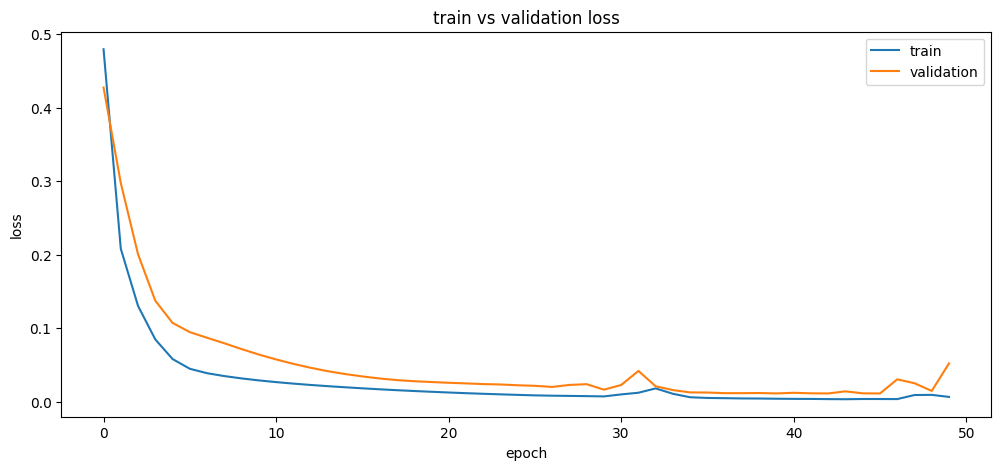

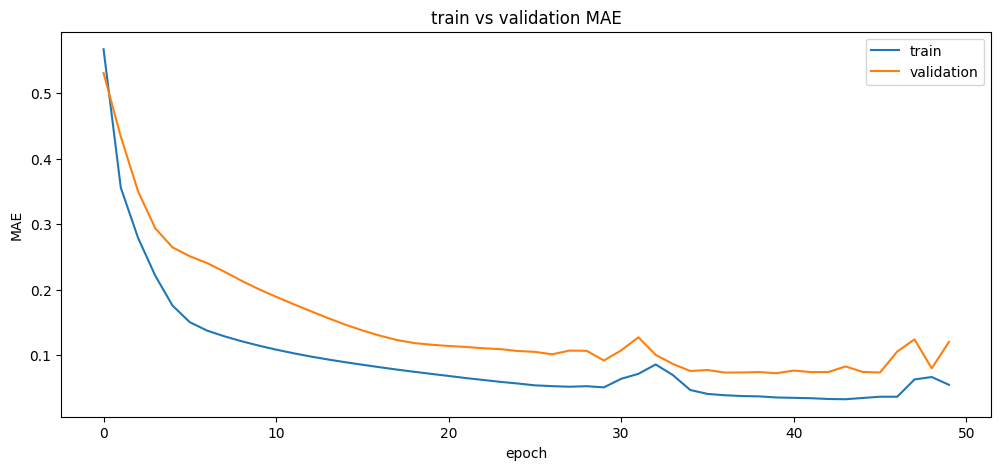

In [81]:
import numpy as np
from sklearn.metrics import mean_absolute_error
import keras
import matplotlib.pyplot as plt


# Convert data to float32
y_test = y_test.flatten()

# Create model structure
lstmModel_1 = keras.Sequential(name="lstmModel_1")
lstmModel_1.add(keras.layers.LSTM(8, input_shape=(X_train.shape[1], X_train.shape[2]), name="LSTM_1")) 
lstmModel_1.add(keras.layers.Dense(1, activation='linear', name="Dense_1"))  # Output layer
lstmModel_1.compile(loss='MeanSquaredError', metrics=['MAE'], optimizer=Adam(learning_rate=0.001))
lstmModel_1.summary()

# Train model using created callback
history = lstmModel_1.fit(X_train, y_train, epochs=50, validation_split=0.33, shuffle=False)

# Loss Graph in train and validation
plt.figure(figsize=(12, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()


# MAE Graph in train and validation
plt.figure(figsize=(12, 5))
plt.plot(history.history['MAE'])
plt.plot(history.history['val_MAE'])
plt.title('train vs validation MAE')
plt.ylabel('MAE')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()


## Second Model (lstmModel_2)

- 2 lstm layer (64-16 neurons)
- 1 dropout layer 
- 1 Output layer
- 50 epochs
  
Trying using a validation set (33% of train set) to calculate loss and MAE every epoch.

Model: "lstmModel_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ LSTM_1 (LSTM)                        │ (None, 5, 64)               │          19,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 5, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ LSTM_2 (LSTM)                        │ (None, 16)                  │           5,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense_1 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,657 (96.32 KB)

 Trainable params: 24,657 (96.32 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - MAE: 0.4623 - loss: 0.3601 - val_MAE: 0.6689 - val_loss: 0.9384
Epoch 2/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - MAE: 0.3596 - loss: 0.2410 - val_MAE: 0.3324 - val_loss: 0.2335
Epoch 3/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - MAE: 0.2974 - loss: 0.1607 - val_MAE: 0.2782 - val_loss: 0.1465
Epoch 4/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - MAE: 0.2215 - loss: 0.0957 - val_MAE: 0.2047 - val_loss: 0.0742
Epoch 5/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - MAE: 0.1664 - loss: 0.0563 - val_MAE: 0.2138 - val_loss: 0.0820
Epoch 6/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - MAE: 0.1531 - loss: 0.0504 - val_MAE: 0.1931 - val_loss: 0.0684
Epoch 7/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - MAE: 0.1486 - loss: 0.0479 - val_MAE: 0.1890 - val_loss: 0.0717
Epoch 8/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - MAE: 0.1397 - loss: 0.0440 - val_MAE: 0.2108 - val_loss: 0.0767
Epoch 9/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - MA

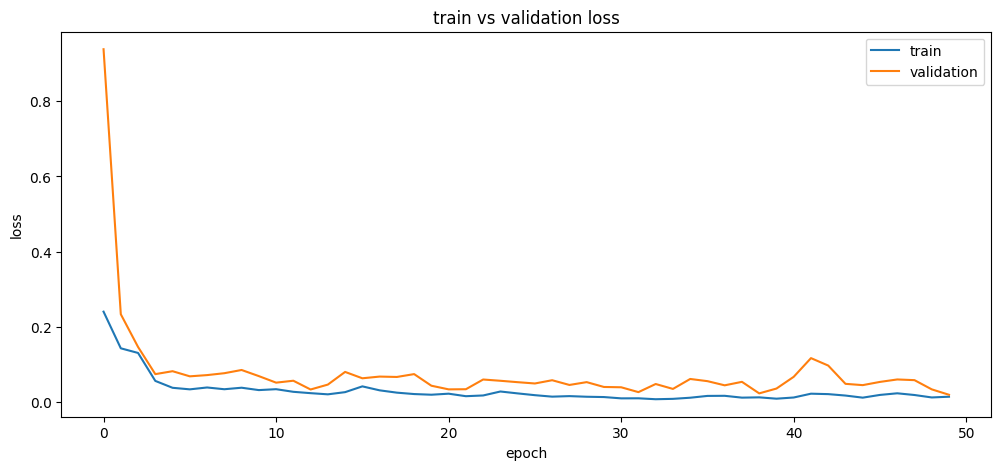

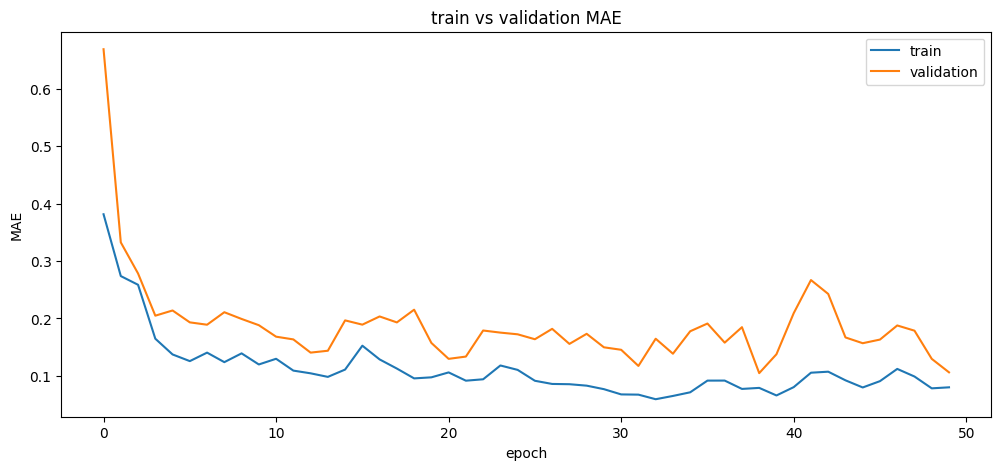

In [80]:
import numpy as np
from sklearn.metrics import mean_absolute_error
import tensorflow as tf
import keras
import matplotlib.pyplot as plt

# Convert data to float32
y_test = y_test.flatten()

# Create model structure
lstmModel_1 = keras.Sequential(name="lstmModel_2")
lstmModel_1.add(keras.layers.LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True, name="LSTM_1")) 
lstmModel_1.add(keras.layers.Dropout(0.2)) # Dropout layer to prevent overfitting
lstmModel_1.add(keras.layers.LSTM(16, name="LSTM_2")) 
lstmModel_1.add(keras.layers.Dense(1, activation='linear', name="Dense_1"))  # Output layer
lstmModel_1.compile(loss='MeanSquaredError', metrics=['MAE'], optimizer=Adam(learning_rate=0.001))
lstmModel_1.summary()

# Train model using created callback
history = lstmModel_1.fit(X_train, y_train, epochs=50, validation_split=0.33, shuffle=False)

# Loss Graph in train and validation
plt.figure(figsize=(12, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()


# MAE Graph in train and validation
plt.figure(figsize=(12, 5))
plt.plot(history.history['MAE'])
plt.plot(history.history['val_MAE'])
plt.title('train vs validation MAE')
plt.ylabel('MAE')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()


## First Model (lstmModel_1) with test and SMAPE

- 1 lstm layer (8 neurons)
- 1 Output layer
- 50 epochs

Using test set to calculate smape after every epoch

Model: "lstmModel_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ LSTM_1 (LSTM)                        │ (None, 8)                   │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense_1 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 649 (2.54 KB)

 Trainable params: 649 (2.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
247/254 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - MAE: 0.7404 - loss: 0.8038 - smape: 137.0154
Epoch 1 - Test Loss: 0.0539, Test MAE: 0.1738, Test SMAPE: 59.2944
254/254 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - MAE: 0.7364 - loss: 0.7975 - smape: 136.0362
Epoch 2/50
250/254 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - MAE: 0.2510 - loss: 0.1194 - smape: 48.5868
Epoch 2 - Test Loss: 0.0743, Test MAE: 0.2394, Test SMAPE: 63.1189
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - MAE: 0.2515 - loss: 0.1199 - smape: 48.6470
Epoch 3/50
238/254 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - MAE: 0.2050 - loss: 0.0743 - smape: 44.9864
Epoch 3 - Test Loss: 0.0650, Test MAE: 0.2260, Test SMAPE: 51.4660
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - MAE: 0.2059 - loss: 0.0749 - smape: 45.0971
Epoch 4/50
234/254 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - MAE: 0.1847 - loss: 0.0597 - smape: 41.6265
Epoch 4 - Test Loss: 0.0553, Test MAE: 0.2046, Test SMAPE: 47.3741
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - MAE: 0.1846 - loss: 0.0595 - smape

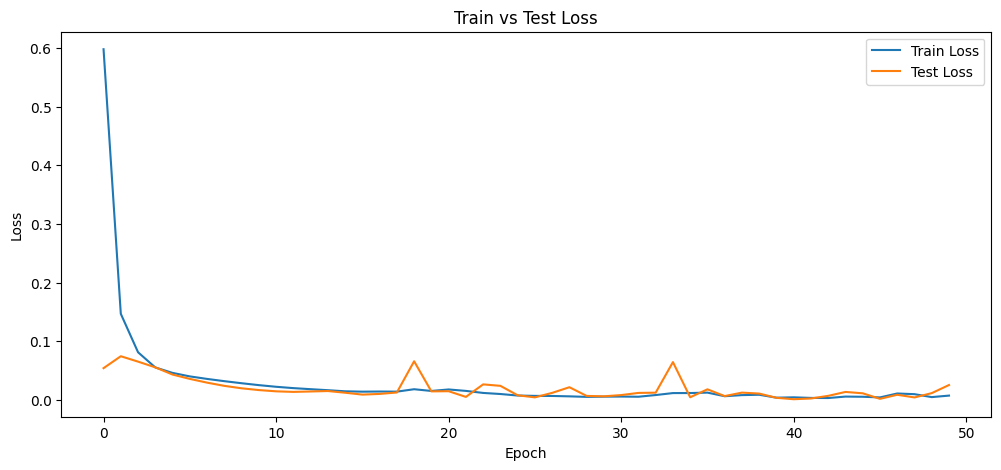

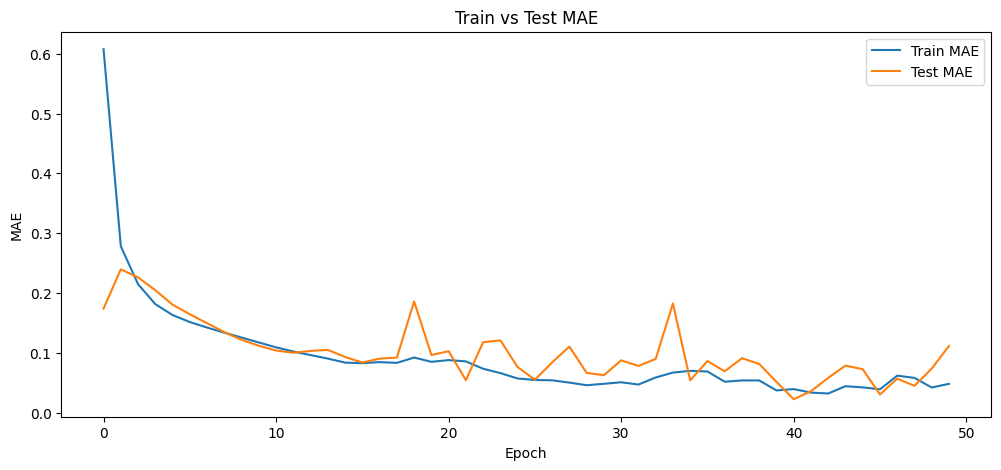

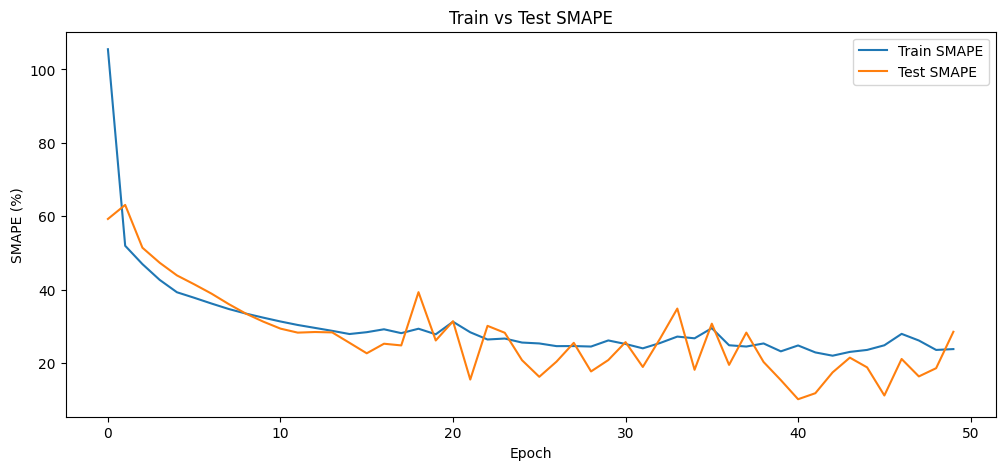

In [82]:
import numpy as np
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
from keras.optimizers import Adam

# SMAPE function
def smape(y_true, y_pred):
    epsilon = keras.backend.epsilon()
    numerator = abs(y_pred - y_true)
    denominator = (abs(y_true) + abs(y_pred)) / 2.0
    return tf.reduce_mean(numerator / (denominator + epsilon)) * 100

# Callback to calculate test metrics at the end of each epoch
class TestMetricsCallback(tf.keras.callbacks.Callback):
    def __init__(self, test_data):
        self.test_data = test_data
        self.test_loss = []
        self.test_mae = []
        self.test_smape = []

    def on_epoch_end(self, epoch, logs=None):
        X_test, y_test = self.test_data
        loss, mae, smape_value = self.model.evaluate(X_test, y_test, verbose=0)
        self.test_loss.append(loss)
        self.test_mae.append(mae)
        self.test_smape.append(smape_value)
        print(f"\nEpoch {epoch+1} - Test Loss: {loss:.4f}, Test MAE: {mae:.4f}, Test SMAPE: {smape_value:.4f}")

# Convert data to float32
y_test = y_test.flatten()

# Create model structure
lstmModel_1 = keras.Sequential(name="lstmModel_1")
lstmModel_1.add(keras.layers.LSTM(8, input_shape=(X_train.shape[1], X_train.shape[2]), name="LSTM_1")) 
lstmModel_1.add(keras.layers.Dense(1, activation='linear', name="Dense_1"))  # Output layer
lstmModel_1.compile(loss='MeanSquaredError', metrics=['MAE', smape], optimizer=Adam(learning_rate=0.001))
lstmModel_1.summary()

# Instantiate the callback
test_metrics_callback = TestMetricsCallback(test_data=(X_test, y_test))

# Train model without validation_split
history = lstmModel_1.fit(X_train, y_train, epochs=50, shuffle=False, callbacks=[test_metrics_callback])

# Plot Train vs Test Loss
plt.figure(figsize=(12, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(test_metrics_callback.test_loss, label='Test Loss')
plt.title('Train vs Test Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

# Plot Train vs Test MAE
plt.figure(figsize=(12, 5))
plt.plot(history.history['MAE'], label='Train MAE')
plt.plot(test_metrics_callback.test_mae, label='Test MAE')
plt.title('Train vs Test MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

# Plot Train vs Test SMAPE
plt.figure(figsize=(12, 5))
plt.plot(history.history['smape'], label='Train SMAPE')
plt.plot(test_metrics_callback.test_smape, label='Test SMAPE')
plt.title('Train vs Test SMAPE')
plt.ylabel('SMAPE (%)')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()


## Second Model (lstmModel_2) with test and SMAPE

- 2 lstm layer (64-16 neurons)
- 1 dropout layer 
- 1 Output layer
- 50 epochs
  
Using test set to calculate smape after every epoch

Model: "lstmModel_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ LSTM_1 (LSTM)                        │ (None, 5, 64)               │          19,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 5, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ LSTM_2 (LSTM)                        │ (None, 16)                  │           5,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense_1 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,657 (96.32 KB)

 Trainable params: 24,657 (96.32 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - MAE: 0.4494 - loss: 0.3453 - smape: 82.4913
Epoch 1 - Test Loss: 0.0434, Test MAE: 0.1323, Test SMAPE: 46.3897
254/254 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - MAE: 0.4492 - loss: 0.3451 - smape: 82.4507
Epoch 2/50
248/254 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - MAE: 0.2039 - loss: 0.0828 - smape: 41.1406
Epoch 2 - Test Loss: 0.0647, Test MAE: 0.2449, Test SMAPE: 52.2695
254/254 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - MAE: 0.2036 - loss: 0.0826 - smape: 41.1167
Epoch 3/50
248/254 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - MAE: 0.2030 - loss: 0.0669 - smape: 48.7755
Epoch 3 - Test Loss: 0.0671, Test MAE: 0.2445, Test SMAPE: 51.6805
254/254 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - MAE: 0.2018 - loss: 0.0663 - smape: 48.5296
Epoch 4/50
253/254 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - MAE: 0.1891 - loss: 0.0656 - smape: 46.8607
Epoch 4 - Test Loss: 0.0860, Test MAE: 0.2583, Test SMAPE: 49.4596
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - MAE: 0.1888 - loss: 0.0654 - smape: 

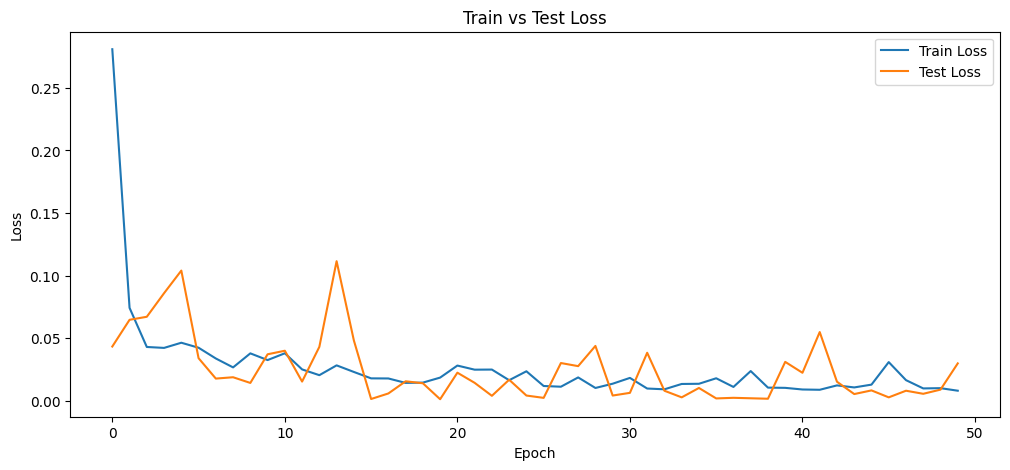

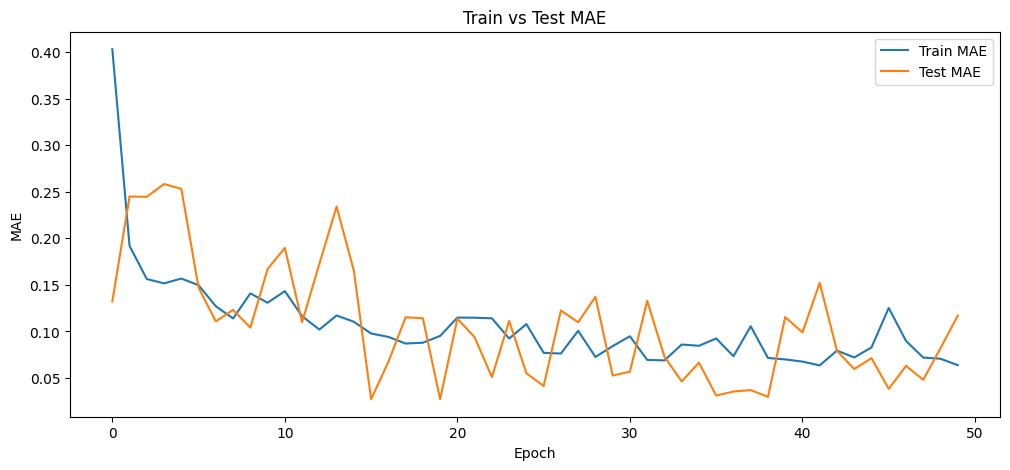

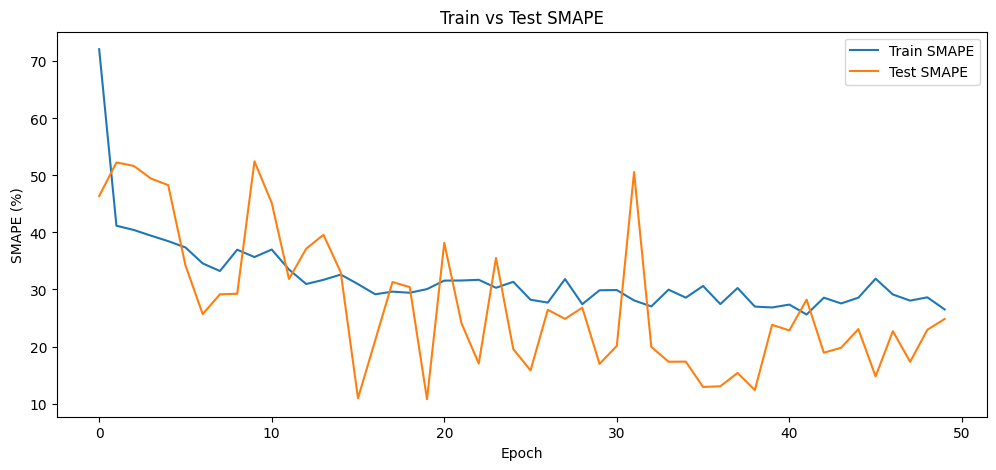

In [76]:
import numpy as np
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
from keras.optimizers import Adam

# SMAPE function
def smape(y_true, y_pred):
    epsilon = keras.backend.epsilon()
    numerator = abs(y_pred - y_true)
    denominator = (abs(y_true) + abs(y_pred)) / 2.0
    return tf.reduce_mean(numerator / (denominator + epsilon)) * 100

# Callback to calculate test metrics at the end of each epoch
class TestMetricsCallback(tf.keras.callbacks.Callback):
    def __init__(self, test_data):
        self.test_data = test_data
        self.test_loss = []
        self.test_mae = []
        self.test_smape = []

    def on_epoch_end(self, epoch, logs=None):
        X_test, y_test = self.test_data
        loss, mae, smape_value = self.model.evaluate(X_test, y_test, verbose=0)
        self.test_loss.append(loss)
        self.test_mae.append(mae)
        self.test_smape.append(smape_value)
        print(f"\nEpoch {epoch+1} - Test Loss: {loss:.4f}, Test MAE: {mae:.4f}, Test SMAPE: {smape_value:.4f}")

# Convert data to float32
# X_train = X_train.astype('float32')
# y_train = y_train.astype('float32')
y_test = y_test.flatten()

# Create model structure
lstmModel_1 = keras.Sequential(name="lstmModel_2")
lstmModel_1.add(keras.layers.LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True, name="LSTM_1")) 
lstmModel_1.add(keras.layers.Dropout(0.2))  # Dropout layer to prevent overfitting
lstmModel_1.add(keras.layers.LSTM(16, name="LSTM_2")) 
lstmModel_1.add(keras.layers.Dense(1, activation='linear', name="Dense_1"))  # Output layer
lstmModel_1.compile(loss='MeanSquaredError', metrics=['MAE', smape], optimizer=Adam(learning_rate=0.001))
lstmModel_1.summary()

# Instantiate the callback
test_metrics_callback = TestMetricsCallback(test_data=(X_test, y_test))

# Train model without validation_split
history = lstmModel_1.fit(X_train, y_train, epochs=50, shuffle=False, callbacks=[test_metrics_callback])

# Plot Train vs Test Loss
plt.figure(figsize=(12, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(test_metrics_callback.test_loss, label='Test Loss')
plt.title('Train vs Test Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

# Plot Train vs Test MAE
plt.figure(figsize=(12, 5))
plt.plot(history.history['MAE'], label='Train MAE')
plt.plot(test_metrics_callback.test_mae, label='Test MAE')
plt.title('Train vs Test MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

# Plot Train vs Test SMAPE
plt.figure(figsize=(12, 5))
plt.plot(history.history['smape'], label='Train SMAPE')
plt.plot(test_metrics_callback.test_smape, label='Test SMAPE')
plt.title('Train vs Test SMAPE')
plt.ylabel('SMAPE (%)')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()


todo: provare una via di mezzo tra i due

provare a ottimizzarli con earlystopping

aumentare epoche? non credo

In [12]:
# isolating the timestamp column to merge with the predictions in a second moment
df_copy = df_scaled
df_copy = df_copy.reset_index()
df_copy = df_copy[['timestamp']]


254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


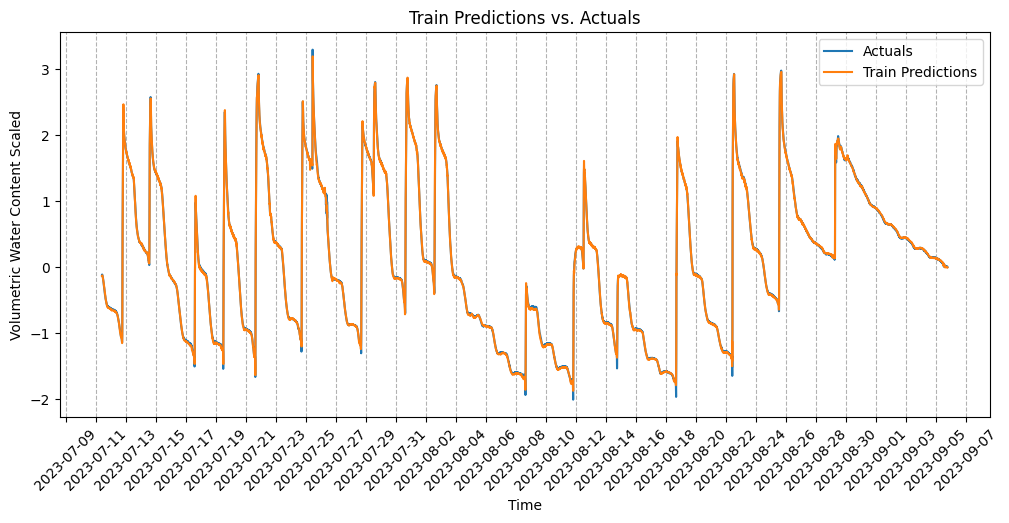

In [15]:
import matplotlib.dates as mdates
from sklearn.metrics import mean_absolute_error
import matplotlib.plt as plt


# TRAIN DATA VISUALIZATION

train_predictions = multiModel.predict(X_train).flatten()
y_train = y_train.flatten()

# Ensure df_copy contains the 'timestamp' column
timestamp_training = df_copy['timestamp'].iloc[:int(SPLIT * len(X_temp))]
train_results = pd.DataFrame(data={'timestamp':timestamp_training, 'Train Predictions':train_predictions, 'Actuals':y_train})

# Plot the test results
plt.figure(figsize=(12, 5))
plt.plot(train_results['timestamp'], train_results['Actuals'], label='Actuals')
plt.plot(train_results['timestamp'], train_results['Train Predictions'], label='Train Predictions')

# Format x-axis to show only dates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval= 2))  # Adjusts to show ticks daily

ax = plt.gca()  
ax.xaxis.grid(which="major", color="black", linestyle="--", alpha=0.3)  # Set x-axis grid

plt.xlabel('Time')
plt.ylabel('Volumetric Water Content Scaled')
plt.title('Train Predictions vs. Actuals')
plt.legend(['Actuals', 'Train Predictions'])
plt.xticks(rotation=45)  # Rotate the x-axis labels if they overlap
plt.show()


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


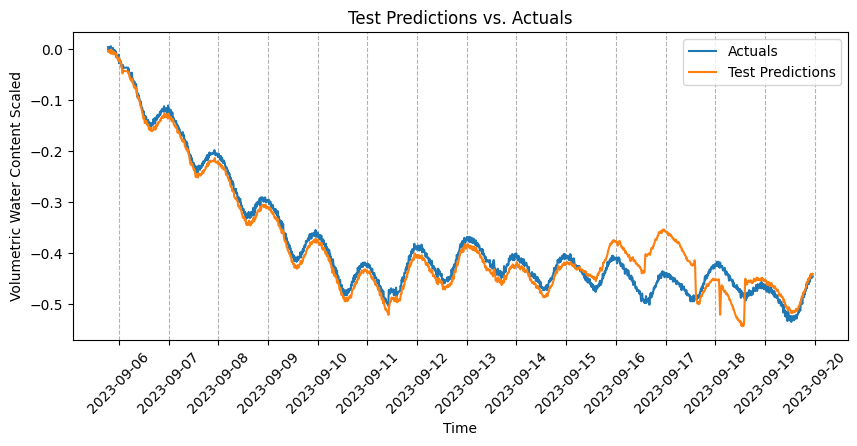

In [26]:
# TEST DATA VISUALIZATION

# Evaluate the model on the test set
test_predictions = multiModel.predict(X_test).flatten()
y_test = y_test.flatten()

timestamp_testing = df_copy['timestamp'].iloc[int(SPLIT * len(X_temp)):].reset_index(drop=True)
timestamp_testing = timestamp_testing[:-5] # Drop last 5 values to match the length of test_predictions

test_results = pd.DataFrame(data={'timestamp':timestamp_testing, 'Test Predictions':test_predictions, 'Actuals':y_test})

# Plot the test results
plt.figure(figsize=(10, 4))
plt.plot(test_results['timestamp'], test_results['Actuals'], label='Actuals')
plt.plot(test_results['timestamp'], test_results['Test Predictions'], label='Test Predictions')

# Format x-axis to show only dates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())  # Adjusts to show ticks daily

ax = plt.gca()  
ax.xaxis.grid(which="major", color="black", linestyle="--", alpha=0.3)  # Set x-axis grid

plt.xlabel('Time')
plt.ylabel('Volumetric Water Content Scaled')
plt.legend(['Actuals', 'Test Predictions'])
plt.title('Test Predictions vs. Actuals')
plt.xticks(rotation=45)  # Rotate the x-axis labels if they overlap
plt.show()

In [17]:
test_results

,timestamp,Test Predictions,Actuals
0,2023-09-05 18:50:00,-0.004408,0.004183
1,2023-09-05 19:00:00,-0.002311,-0.002550
2,2023-09-05 19:10:00,-0.005291,-0.000867
3,2023-09-05 19:20:00,-0.005256,0.004183
4,2023-09-05 19:30:00,-0.003470,0.004183
...,...,...,...
2025,2023-09-19 22:20:00,-0.440761,-0.446924
2026,2023-09-19 22:30:00,-0.441105,-0.448607
2027,2023-09-19 22:40:00,-0.441964,-0.446924
2028,2023-09-19 22:50:00,-0.441720,-0.445241


In [27]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, test_predictions)
mae

0.0211719918570407